# 평가

### 분류모델 평가

In [65]:
# 전처리 함수 정의

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

def fillna(df):
    """
    결측치 처리 함수
    - Age : 평균치로 대체
    - Cabin : 'N' 기본값으로 대체
    - Embarked : 'N' 기본값으로 대체
    """
    df['Age'] = df['Age'].fillna(df['Age'].mean())
    df['Cabin'] = df['Cabin'].fillna('N')
    df['Embarked'] = df['Embarked'].fillna('N')

    return df


def drop_feature(df):
    """
    모델 훈련과 관련 없는 속성 제거
    - PassengerId, Name, Ticket
    """
    return df.drop(['PassengerId', 'Name', 'Ticket'], axis=1)


def encode_feature(df):
    """
    범주형 데이터를 숫자로 인코딩
    - Sex, Cabin, Embarked
    """
    df['Cabin'] = df['Cabin'].str[:1]    # Cabin 데이터의 앞 글자만 가져옴

    categories = ['Sex', 'Cabin', 'Embarked']
    for cate_item in categories:
        label_encoder = LabelEncoder()
        df[cate_item] = label_encoder.fit_transform(df[cate_item])
    
    return df


def preprocess_data(df):
    """
    전처리 함수 호출
    """
    df = drop_feature(df)
    df = fillna(df)
    df = encode_feature(df)

    return df


def scailing_feature(train_data, test_data):
    """
    특성 스케일링 (정규화)
    """
    scaler = StandardScaler()
    train_scaled = scaler.fit_transform(train_data)
    test_scaled = scaler.transform(test_data)
    
    return train_scaled, test_scaled

##### 정확도 (Accuracy score)

- 전체 샘플 중에서 올바르게 예측한 샘플의 비율
- 데이터가 불균형한 경우 정확도는 비현실적인 성능을 낼 수 있음

In [66]:
# 잘못 학습된 모델 만들어보기
from sklearn.base import BaseEstimator
import numpy as np

# 성별로만 판별하는 모델 작성
class MyTitanicClassifier(BaseEstimator):
    # 훈련 메서드
    def fit(self, X, y):
        pass

    # 결과 예측 메서드
    def predict(self, X):
        pred = np.zeros((X.shape[0], 1))
        for i in range(X.shape[0]):
            sex = X['Sex'].iloc[i]
            if sex == 0:        # 여성이면
                pred[i] = 1     # 생존이라고 예측
        return pred

In [67]:
import pandas as pd
from sklearn.model_selection import train_test_split

# 데이터 로드
df = pd.read_csv('./data/titanic.csv')

# 입력-라벨 데이터 분리
X = df.drop('Survived', axis=1)
y  = df['Survived']

# 데이터 전처리
X = preprocess_data(X)

# 학습-테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [68]:
from sklearn.metrics import accuracy_score

# 모델 훈련
my_classifier = MyTitanicClassifier()
my_classifier.fit(X_train, y_train)

# 예측
pred_train = my_classifier.predict(X_train)
pred_test = my_classifier.predict(X_test)

# 정확도로 평가 (accuracy_score)
print(f"훈련 데이터 정확도: { accuracy_score(y_train, pred_train) }")
print(f"평가 데이터 정확도: { accuracy_score(y_test, pred_test) }")

훈련 데이터 정확도: 0.7889221556886228
평가 데이터 정확도: 0.7802690582959642


##### 혼동 행렬 (Confusion Matrix)

![](https://d.pr/i/rtYBJv+)

In [69]:
"""
# 다중분류의 confusion matrix 예시 참고

from sklearn.metrics import confusion_matrix, precision_score, recall_score
from sklearn.datasets import load_digits
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import matplotlib.pyplot as plt

digits = load_digits()
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d', xticklabels=digits.target_names, yticklabels=digits.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
"""

"\n# 다중분류의 confusion matrix 예시 참고\n\nfrom sklearn.metrics import confusion_matrix, precision_score, recall_score\nfrom sklearn.datasets import load_digits\nfrom sklearn.ensemble import RandomForestClassifier\nimport seaborn as sns\nimport matplotlib.pyplot as plt\n\ndigits = load_digits()\nX_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2, random_state=42)\n\nmodel = RandomForestClassifier(n_estimators=100, random_state=42)\nmodel.fit(X_train, y_train)\n\ny_pred = model.predict(X_test)\n\ncm = confusion_matrix(y_test, y_pred)\n\nsns.heatmap(cm, annot=True, fmt='d', xticklabels=digits.target_names, yticklabels=digits.target_names)\nplt.xlabel('Predicted')\nplt.ylabel('Actual')\nplt.show()\n"

In [70]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score

- 정밀도 (Precision)
    - 양성이라고 예측한 것(TP + FP) 중에 실제 양성(TP)일 확률
    - 정밀도가 중요한 지표인 경우: 음성인 데이터를 양성으로 예측하면 안되는 경우 (스팸메일 분류 등)

In [71]:
matrix = confusion_matrix(y_test, pred_test)
matrix

array([[115,  24],
       [ 25,  59]])

In [72]:
p_score = 59 / (59 + 24)
p_score, precision_score(y_test, pred_test)

(0.7108433734939759, 0.7108433734939759)

- 재현율 (Recall)
    - 실제 양성(TP + FN) 중에 양성으로 예측(TP)한 확률
    - 재현율이 중요한 지표인 경우: 양성인 데이터를 음성으로 예측하면 안되는 경우 (암 진단, 보험/금융 사기 탐지 등)

In [73]:
recall_score(y_test, pred_test)

0.7023809523809523

---

In [74]:
# 평가 지표 출력 함수
def evaluate_binary_classification(y_true, y_pred):
    print('혼동행렬:')
    print(confusion_matrix(y_true, y_pred))
    print(f'정확도: { accuracy_score(y_true, y_pred) }, 정밀도: { precision_score(y_true, y_pred) }, 재현율: { recall_score(y_true, y_pred) }')

In [75]:
# 잘못 학습된 모델 만들어보기 2
class MyDeathClassifier(BaseEstimator):
    def fit(self, X, y):
        pass

    def predict(self, X):
        return np.zeros((X.shape[0], 1))    # 전부 사망

# 모델 학습
my_classifier = MyDeathClassifier()
my_classifier.fit(X_train, y_train)

# 예측
pred_train = my_classifier.predict(X_train)
pred_test = my_classifier.predict(X_test)

# 평가
evaluate_binary_classification(y_train, pred_train)
evaluate_binary_classification(y_test, pred_test)

혼동행렬:
[[410   0]
 [258   0]]
정확도: 0.6137724550898204, 정밀도: 0.0, 재현율: 0.0
혼동행렬:
[[139   0]
 [ 84   0]]
정확도: 0.6233183856502242, 정밀도: 0.0, 재현율: 0.0


c:\Users\Playdata\AppData\Local\anaconda3\envs\ml_env\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\Playdata\AppData\Local\anaconda3\envs\ml_env\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


In [76]:
from sklearn.linear_model import LogisticRegression

# 모델 학습
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)

# 예측
pred_train = lr_clf.predict(X_train)
pred_test = lr_clf.predict(X_test)

# 평가
evaluate_binary_classification(y_train, pred_train)
evaluate_binary_classification(y_test, pred_test)

혼동행렬:
[[350  60]
 [ 77 181]]
정확도: 0.7949101796407185, 정밀도: 0.7510373443983402, 재현율: 0.7015503875968992
혼동행렬:
[[117  22]
 [ 23  61]]
정확도: 0.7982062780269058, 정밀도: 0.7349397590361446, 재현율: 0.7261904761904762


c:\Users\Playdata\AppData\Local\anaconda3\envs\ml_env\Lib\site-packages\sklearn\linear_model\_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


- 정밀도와 재현율의 trade-off
    - 분류 결정 임계치(threshold)를 낮추면? Positive로 예측할 확률이 높아진다!
        - 정밀도는 낮아지고, 재현율은 높아진다.
    - 분류 결정 임계치(threshold)를 높이면? Positive로 예측할 확률이 낮아진다!
        - 정밀도는 높아지고, 재현율은 낮아진다.

In [77]:
# Binarizer
from sklearn.preprocessing import Binarizer

temp_X = [[1, -1, 2], [2, 0, 0.8], [0, 1.1, 1.2]]
# Binarizer(threshold)
# - threshold보다 크면 1 반환
# - threshold보다 작거나 같으면 0 반환
binarizer = Binarizer(threshold=1)
adj_X = binarizer.fit_transform(temp_X)
adj_X

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 1.]])

In [78]:
# 예측 확률에 기반한 분류
pred_proba = lr_clf.predict_proba(X_test)
print(pred_proba[:7])

pred = lr_clf.predict(X_test)
print(pred[:7])

[[0.83741741 0.16258259]
 [0.88842911 0.11157089]
 [0.92060845 0.07939155]
 [0.0559761  0.9440239 ]
 [0.29857741 0.70142259]
 [0.50640704 0.49359296]
 [0.09195634 0.90804366]]
[0 0 0 1 1 0 1]


In [79]:
from sklearn.preprocessing import Binarizer

# 1(생존)일 확률만 가져오고 + 배치 차원 추가
predict_proba_1 = pred_proba[:, 1].reshape(-1, 1)

binarizer = Binarizer(threshold=0.5)
custom_pred = binarizer.fit_transform(predict_proba_1)
evaluate_binary_classification(y_test, custom_pred)

binarizer = Binarizer(threshold=0.6)
custom_pred = binarizer.fit_transform(predict_proba_1)
evaluate_binary_classification(y_test, custom_pred)

혼동행렬:
[[117  22]
 [ 23  61]]
정확도: 0.7982062780269058, 정밀도: 0.7349397590361446, 재현율: 0.7261904761904762
혼동행렬:
[[124  15]
 [ 30  54]]
정확도: 0.7982062780269058, 정밀도: 0.782608695652174, 재현율: 0.6428571428571429


In [80]:
# 임계치 별 평가 결과 확인
thresholds = [0.4, 0.45, 0.5, 0.55, 0.6]

def evaluate_by_threshold(y_true, y_pred, thresholds):
    for threshold in thresholds:
        binarizer = Binarizer(threshold=threshold)
        custom_pred = binarizer.fit_transform(y_pred)
        evaluate_binary_classification(y_true, custom_pred)

evaluate_by_threshold(y_test, predict_proba_1, thresholds)

혼동행렬:
[[109  30]
 [ 19  65]]
정확도: 0.7802690582959642, 정밀도: 0.6842105263157895, 재현율: 0.7738095238095238
혼동행렬:
[[114  25]
 [ 19  65]]
정확도: 0.8026905829596412, 정밀도: 0.7222222222222222, 재현율: 0.7738095238095238
혼동행렬:
[[117  22]
 [ 23  61]]
정확도: 0.7982062780269058, 정밀도: 0.7349397590361446, 재현율: 0.7261904761904762
혼동행렬:
[[121  18]
 [ 23  61]]
정확도: 0.8161434977578476, 정밀도: 0.7721518987341772, 재현율: 0.7261904761904762
혼동행렬:
[[124  15]
 [ 30  54]]
정확도: 0.7982062780269058, 정밀도: 0.782608695652174, 재현율: 0.6428571428571429


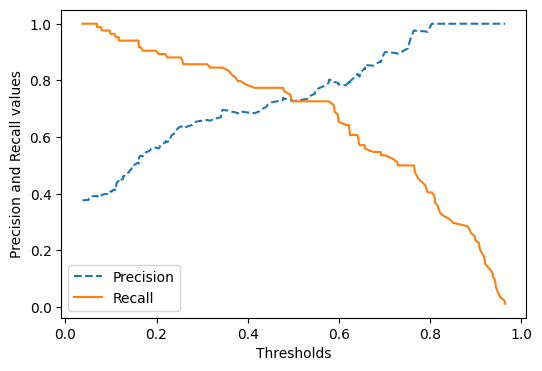

In [81]:
# 정밀도-재현율 변화 과정 시각화
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# threshold에 따른 precision, recall 값 반환
precisions, recalls, thresholds = precision_recall_curve(y_test, predict_proba_1)

# 기준 thresholds 211개
# - 정밀도와 재현율에 추가된 마지막 값은 극단적 임계값 설정에 대한 계산 결과
# - 정밀도는 마지막에 1 추가 (임계값이 매우 낮아 모든 샘플이 양성으로 예측된 경우)
# - 재현율은 마지막에 0 추가 (임계값이 매우 높아 모든 샘플이 음성으로 예측된 경우)
# precisions.shape, recalls.shape, thresholds.shape

plt.figure(figsize=(6, 4))
plt.plot(thresholds, precisions[:-1], linestyle='--', label='Precision')
plt.plot(thresholds, recalls[:-1], label='Recall')
plt.xlabel('Thresholds')
plt.ylabel('Precision and Recall values')
plt.legend()
plt.show()

- F1-score
    - 정밀도와 재현율을 결합한 지표

In [82]:
from sklearn.metrics import f1_score

f1_score(y_test, pred_test)

0.7305389221556886

In [83]:
# 오차행렬, 정확도, 정밀도, 재현율, f1-score 계산 및 출력 함수
def evaluate_binary_classification(y_true, y_pred):
    print('혼동행렬:\n', confusion_matrix(y_true, y_pred))
    print(f'정확도: {accuracy_score(y_true, y_pred):.2f}, 정밀도: {precision_score(y_true, y_pred):.2f}, 재현율: {recall_score(y_true, y_pred):.2f}, f1: {f1_score(y_true, y_pred):.5f}')

In [84]:
# 임계치 별 평가 결과 확인
thresholds = [0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7]

def evaluate_by_threshold(y_true, y_pred, thresholds):
    for threshold in thresholds:
        binarizer = Binarizer(threshold=threshold)
        custom_pred = binarizer.fit_transform(y_pred)
        evaluate_binary_classification(y_true, custom_pred)

evaluate_by_threshold(y_test, predict_proba_1, thresholds)

혼동행렬:
 [[109  30]
 [ 19  65]]
정확도: 0.78, 정밀도: 0.68, 재현율: 0.77, f1: 0.72626
혼동행렬:
 [[114  25]
 [ 19  65]]
정확도: 0.80, 정밀도: 0.72, 재현율: 0.77, f1: 0.74713
혼동행렬:
 [[117  22]
 [ 23  61]]
정확도: 0.80, 정밀도: 0.73, 재현율: 0.73, f1: 0.73054
혼동행렬:
 [[121  18]
 [ 23  61]]
정확도: 0.82, 정밀도: 0.77, 재현율: 0.73, f1: 0.74847
혼동행렬:
 [[124  15]
 [ 30  54]]
정확도: 0.80, 정밀도: 0.78, 재현율: 0.64, f1: 0.70588
혼동행렬:
 [[130   9]
 [ 36  48]]
정확도: 0.80, 정밀도: 0.84, 재현율: 0.57, f1: 0.68085
혼동행렬:
 [[134   5]
 [ 39  45]]
정확도: 0.80, 정밀도: 0.90, 재현율: 0.54, f1: 0.67164


##### ROC Curve - AUC

- ROC Curve (Receiver Operation Characteristic Curve, 수신자 조작 특성 커브)
    - x축: FPR (False Positive Rate), 실제 음성을 잘못 예측한 비율
        - FPR = FP / (FP + TN)
    - y축: TPR (True Positive Rate), recall score
        - TPR = TP / (FN + TP)
- AUC (Area Under Curve) : ROC 곡선 아래 면적 (1에 가까울수록 성능 좋음)

In [87]:
from sklearn.metrics import roc_curve

y_true_sample = np.array([0, 0, 1, 1])
y_pred_sample = np.array([0.1, 0.4, 0.35, 0.8])

fpr, tpr, thresholds = roc_curve(y_true_sample, y_pred_sample)
fpr, tpr, thresholds

(array([0. , 0. , 0.5, 0.5, 1. ]),
 array([0. , 0.5, 0.5, 1. , 1. ]),
 array([ inf, 0.8 , 0.4 , 0.35, 0.1 ]))

c:\Users\Playdata\AppData\Local\anaconda3\envs\ml_env\Lib\site-packages\sklearn\linear_model\_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


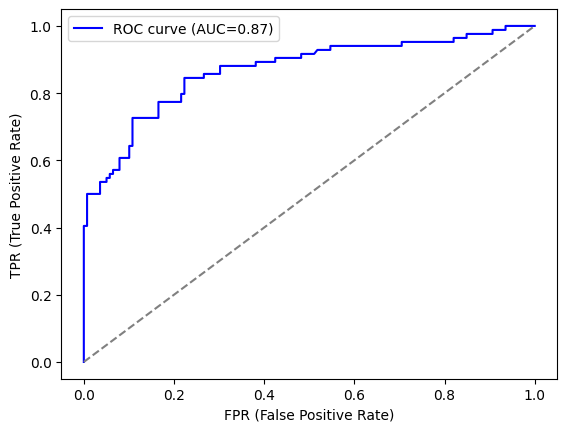

In [ ]:
from sklearn.metrics import auc

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred_proba = model.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC={roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('FPR (False Positive Rate)')
plt.ylabel('TPR (True Positive Rate)')
plt.legend()
plt.show()

### 회귀모델 평가

In [89]:
# 샘플 데이터
y_true = [3, 0.5, 2, 7]
y_pred = [2.5, 0, 2, 9]

In [90]:
from sklearn.metrics import mean_squared_error          # MSE (평균 제곱 오차)
from sklearn.metrics import root_mean_squared_error     # RMSE (제곱 평균 제곱근 오차)
from sklearn.metrics import mean_absolute_error         # MAE (평균 절대 오차)
from sklearn.metrics import mean_squared_log_error      # MSLE (평균 제곱 로그 오차)
from sklearn.metrics import root_mean_squared_log_error # RMSLE (제곱 평균 제곱근 로그 오차)
from sklearn.metrics import r2_score                    # R^2 결정계수

print(mean_squared_error(y_true, y_pred))
print(root_mean_squared_error(y_true, y_pred))
print(mean_absolute_error(y_true, y_pred))
print(mean_squared_log_error(y_true, y_pred))
print(root_mean_squared_log_error(y_true, y_pred))
print(r2_score(y_true, y_pred))

1.125
1.0606601717798212
0.75
0.058006407800631835
0.2408451946803835
0.8059299191374663
